# Technical Parameters

## Package loading

In [1]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


### Project name

In [2]:
name = 'classification_Qualitative_Bankruptcy'

### Thresholds & other parameters

In [3]:
problem_type = 'classification'

In [4]:
data_size = 'small'

In [5]:
threshold_NaN = 0.5

In [6]:
threshold_cat = 5

In [7]:
threshold_Z = 3.0

In [8]:
test_size = 0.33

In [9]:
threshold_entropy = 0.75

In [10]:
undersampling = False

In [11]:
undersampler = 'Random'

In [12]:
threshold_corr = 1.0

In [13]:
threshold_model = 5

In [14]:
threshold_score = 0.7

In [15]:
threshold_feature = 5

In [16]:
with_keras = False

In [17]:
CPU = False

In [18]:
time_dep = False

In [19]:
date_idx = 0

In [20]:
lag_number = 3

In [21]:
level_1_model = 'regression'

In [22]:
random_state = 42

### File & target

In [23]:
path = '/home/fifi/Documents/ezstacking/dataset/Qualitative_Bankruptcy.csv'

In [24]:
df = pd.read_csv(path)

In [25]:
target_col = 'Class'

### Deployment

In [26]:
FastAPI_port = 8000

In [27]:
Docker_port = 80

# Exploratory Data Analysis (EDA)

## Drop user's columns & Duplicates

In [28]:
user_drop_cols = []

Dataset before deletion

In [29]:
display(df)

Industrial_Risk Management_Risk Financial_Flexibility Credibility  \
0                 P               P                     A           A   
1                 N               N                     A           A   
2                 A               A                     A           A   
3                 P               P                     P           P   
4                 N               N                     P           P   
..              ...             ...                   ...         ...   
245               N               N                     A           N   
246               P               N                     N           N   
247               A               N                     N           N   
248               N               N                     N           N   
249               P               N                     N           N   

    Competitiveness Operating_Risk Class  
0                 A              P    NB  
1                 A              N    NB  
2                 A              A    NB  
3                 P              P    NB  
4                 P              N    NB  
..              ...            ...   ...  
245               N              N     B  
246               N              N     B  
247               N              N     B  
248               N              N     B  
249               A              A     B  

[250 rows x 7 columns]

In [30]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [31]:
df = duplicates(df)

Number of rows before removing: 250
Number of duplicate rows: 147
Number of rows after removing: 103


Drop all the rows for which the target is NaN

In [32]:
df = df.dropna(subset=[target_col])

Dataset after deletion of user’s columns and duplicates

In [33]:
display(df)

Industrial_Risk Management_Risk Financial_Flexibility Credibility  \
0                 P               P                     A           A   
1                 N               N                     A           A   
2                 A               A                     A           A   
3                 P               P                     P           P   
4                 N               N                     P           P   
..              ...             ...                   ...         ...   
171               A               P                     N           N   
175               N               A                     N           N   
179               N               N                     N           P   
182               N               N                     N           P   
215               N               A                     P           A   

    Competitiveness Operating_Risk Class  
0                 A              P    NB  
1                 A              N    NB  
2                 A              A    NB  
3                 P              P    NB  
4                 P              N    NB  
..              ...            ...   ...  
171               N              N     B  
175               N              N     B  
179               N              P     B  
182               N              N     B  
215               N              P     B  

[103 rows x 7 columns]

### Dataset copy

In [34]:
df_copy = df.copy()

## Dataset Information

### Dataframe structure

In [35]:
plot_dataframe_structure(df)

### Dataframe statistics

In [36]:
display(df.describe().T)

count unique top freq
Industrial_Risk         103      3   A   36
Management_Risk         103      3   N   42
Financial_Flexibility   103      3   A   36
Credibility             103      3   A   42
Competitiveness         103      3   P   53
Operating_Risk          103      3   N   41
Class                   103      2  NB   78

## Which columns could be categorical ?

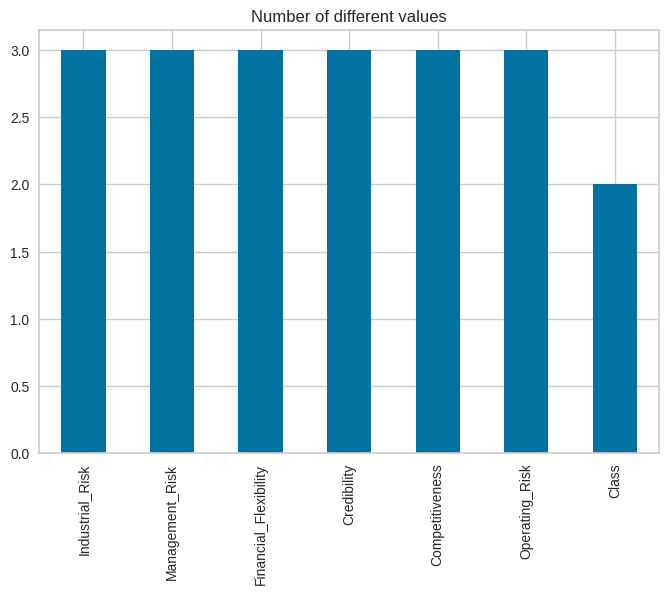

In [37]:
plot_categorical(df)

## Dataset Cleaning

### Drop NaN:

In [38]:
df, drop_cols = drop_na(df, target_col, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [39]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [40]:
display(dropped_cols)

array([], dtype=float64)

### Encoding data:

In [41]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding object column: Industrial_Risk
Encoding object column: Management_Risk
Encoding object column: Financial_Flexibility
Encoding object column: Credibility
Encoding object column: Competitiveness
Encoding object column: Operating_Risk
Encoding object column: Class


### Imputing NaN using IterativeImputer

In [42]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


#### Imputation

In [43]:
df = imputation(df)

No need to impute data.


### Data compression:

In [44]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.00MB
Memory usage after optimization is: 0.00MB
Decreased by 58.3%


#### Dataframe structure after compression

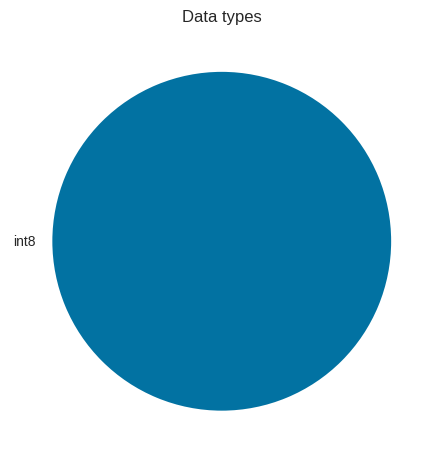

In [45]:
plot_dataframe_structure(df)

### Outliers:

In [46]:
df = outliers(df, threshold_Z)

Using Z_score,  0  rows will be suppressed.


## Plottings

### Ranking 

#### Ranking 1D 

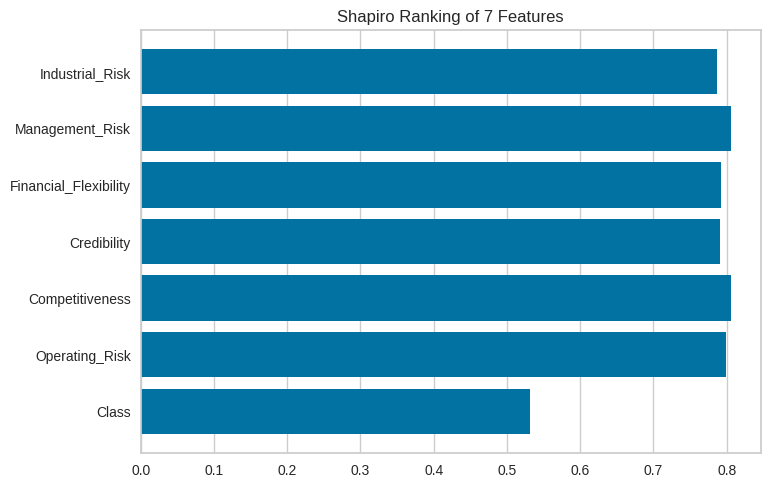

In [47]:
rank1d(df);

#### Ranking 2D 

##### Ranking 2D according to Pearson

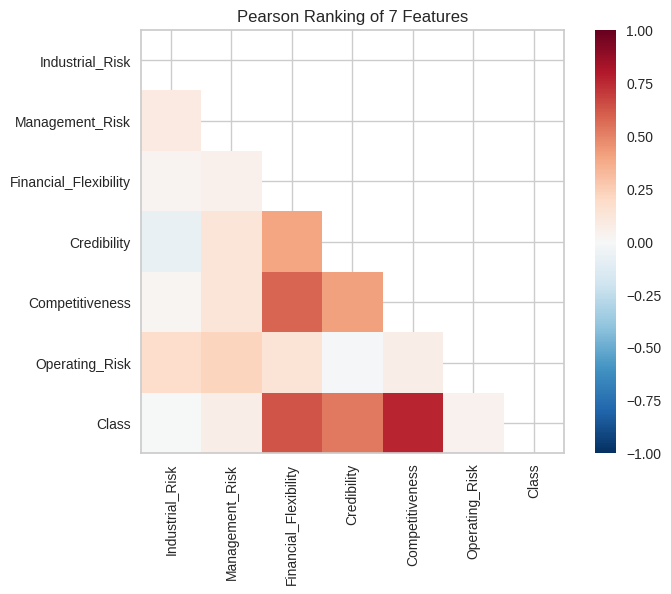

In [48]:
rank2d(df, algorithm='pearson');

##### Ranking 2D based on covariance

In [49]:
rank2d(df, algorithm='covariance');

##### Ranking 2D according to Spearman

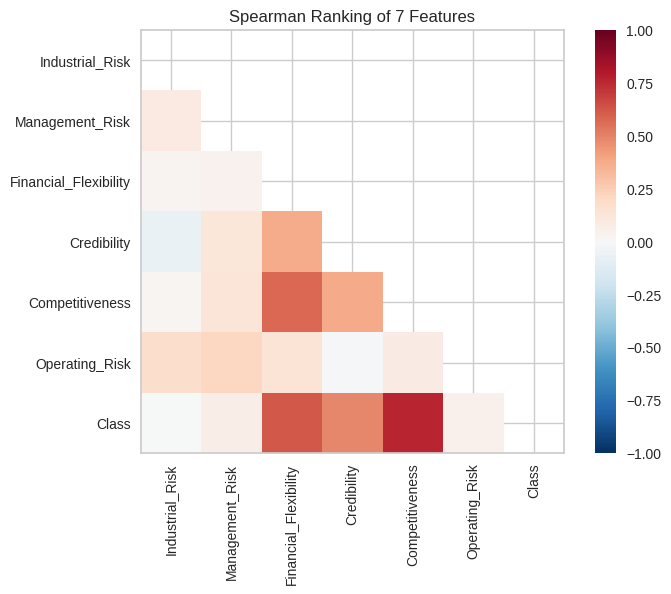

In [50]:
rank2d(df, algorithm='spearman');

##### Ranking 2D according to Kendalltau

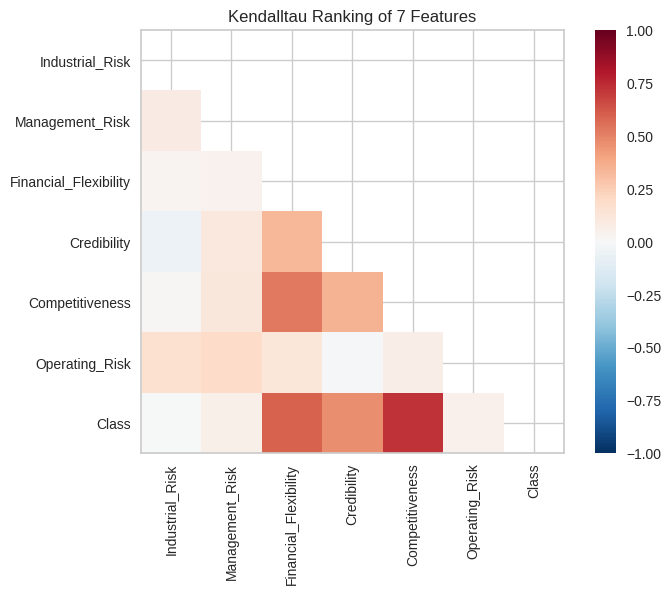

In [51]:
rank2d(df, algorithm='kendalltau');

### Correlation according to Pearson

In [52]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [53]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Check columns that should be dropped

In [54]:
print(dropped_cols)

[]


### Correlation according to Spearman (hierarchical clustering)

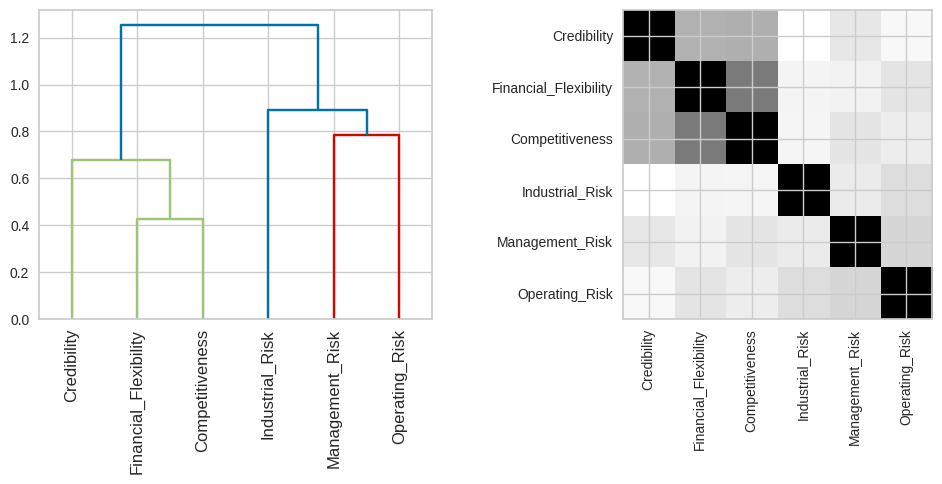

cluster_ids =  [2 2 1 1 1 2]
selected_features_names =  ['Industrial_Risk', 'Financial_Flexibility']


In [55]:
selected_features_names = hierarchical_clustering(df.drop(target_col, axis=1), t=1) 
print('selected_features_names = ', selected_features_names)

### Correlation with Yellow Bricks

##### Splitting dataframe in features and targets

In [56]:
y = df[target_col]

In [57]:
X = df.drop(target_col, axis=1)

In [58]:
feature_correlation(X, y);

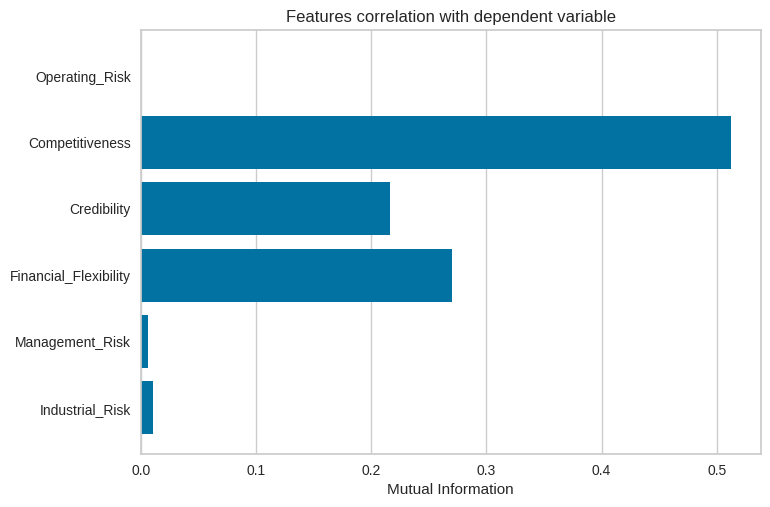

In [59]:
feature_correlation(X, y, method='mutual_info-classification');

### PCA

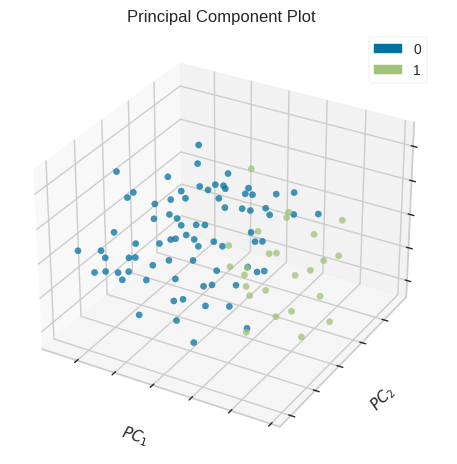

In [60]:
pca_decomposition(X, y.astype(int), projection=3);

### Class balancing

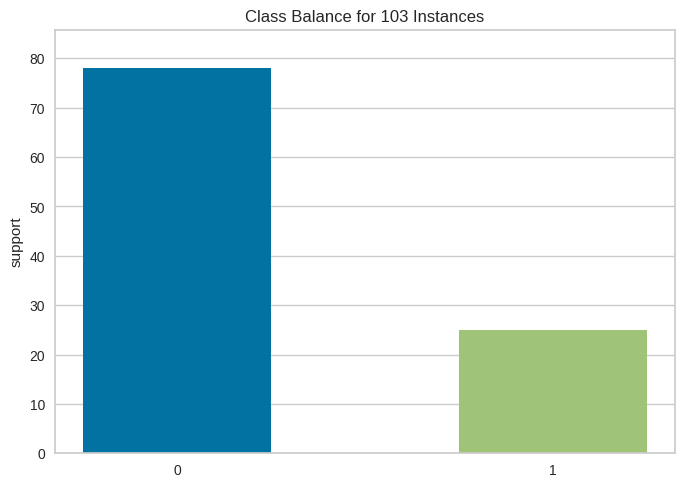

Entropy =  0.7995318105266797


In [61]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

# Splitting

In [62]:
df = df_copy

## Splitting dataframe in features and targets

In [63]:
y = df[target_col]

In [64]:
X = df.drop(target_col, axis=1)

### Dimensions

In [65]:
nb_features = len(X.columns.tolist())

In [66]:
nb_targets = len(y.unique())

In [67]:
layer_size = nb_features + nb_targets + 2

### Splitting data in train and test sets 

In [68]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling=undersampling, undersampler=undersampler, random_state=random_state)

### Encoding

In [69]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

# Modeling: Model selection

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [70]:
cat_selector, num_selector = get_features()

#### For models based on tree

In [71]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [72]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [73]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

#### For models not based on tree

In [74]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [75]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [76]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

#### Level-0 models

In [77]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTCG', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='gini', random_state = random_state))), 
          ('DTCE', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='entropy', random_state = random_state))), 
          ('RFCG', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=100, random_state = random_state))), 
          ('RFCE', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=100, random_state = random_state))), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True, random_state = random_state))), 
          ('SGDCH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='hinge', penalty='elasticnet', random_state = random_state))), 
          ('SGDCLL', make_pipeline(ntree_preprocessor, SGDClassifier(loss='log_loss', penalty='elasticnet', random_state = random_state))), 
          ('SGDCMH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='modified_huber', penalty='elasticnet', random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('MLPC1', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPC2', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('SVCL', make_pipeline(ntree_preprocessor, SVC(kernel='linear', random_state = random_state))), 
          ('SVCP', make_pipeline(ntree_preprocessor, SVC(kernel='poly', random_state = random_state))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf', random_state = random_state))), 
          ('SVCS', make_pipeline(ntree_preprocessor, SVC(kernel='sigmoid', random_state = random_state))), 
          ('GBC', make_pipeline(tree_preprocessor, GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state = random_state))), 
          ]

#### Level-1 model

In [78]:
level_1 = RidgeClassifier(alpha=1, positive=True, random_state = random_state)

#### Stacking for classification

In [79]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

## Model fitting

In [80]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anacon

CPU times: user 511 ms, sys: 139 ms, total: 650 ms
Wall time: 8.15 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                                  Series([], Name: column_name, dtype: object)),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImput...
                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                  unknown_value=-1))]),
                                                                                  0          Industrial_Risk
1          Management_Risk
2    Financial_Flexibility
3              Credibility
4          Competitiveness
5           Operating_Risk
Name: column_name, dtype: object)])),
                                                ('gradientboostingclassifier',
                                                 GradientBoostingClassifier(learning_rate=1.0,
                                                                            random_state=42))]))],
                   final_estimator=RidgeClassifier(alpha=1, positive=True,
                                                   random_state=42),
                   n_jobs=-1)

## Model evaluation

### Model scoring

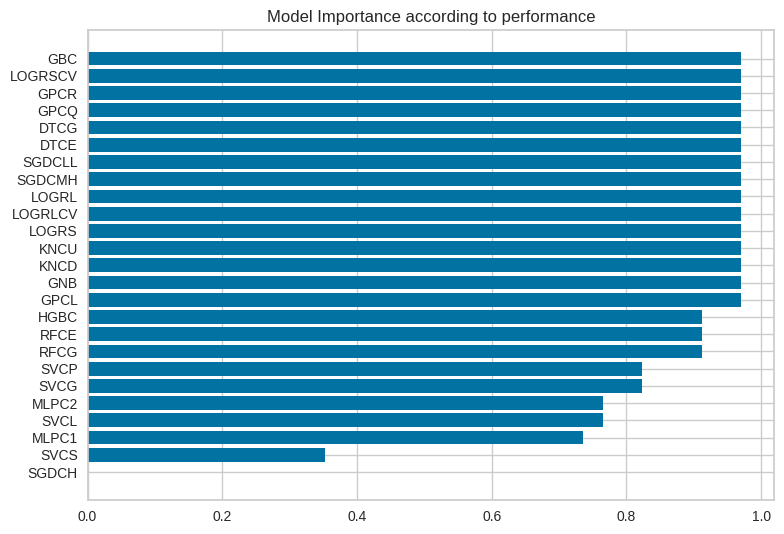

In [81]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### ROC/AUC

In [82]:
classes = y.unique() 
binary = True if classes.shape[0] == 2 else False

In [83]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes, binary=binary);

### Classification report

In [84]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Confusion matrix

In [85]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Class prediction error

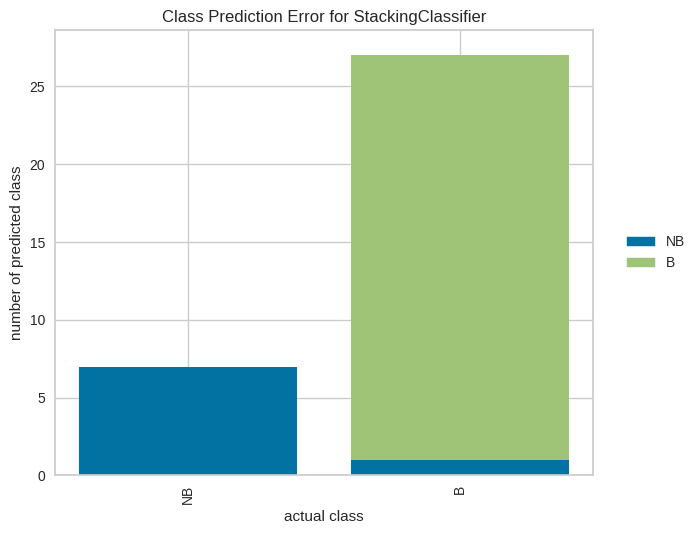

In [86]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Model inspection

### Model importance

In [87]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

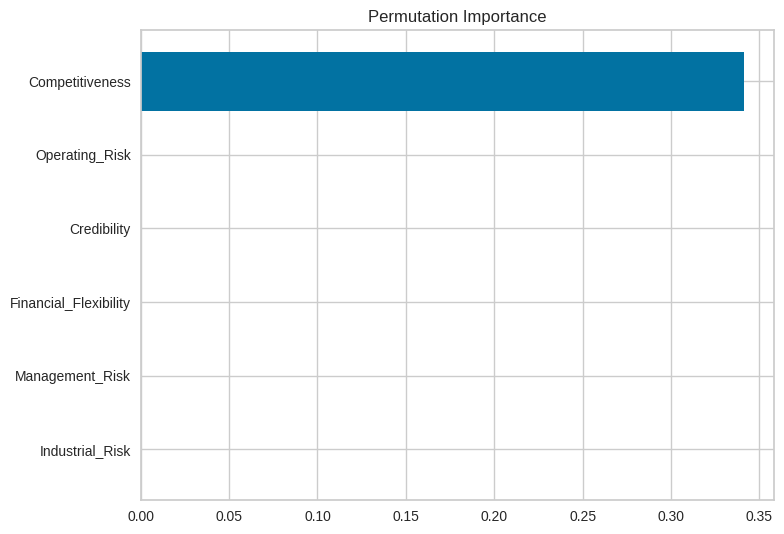

In [88]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Modeling: Feature selection

#### Filtered Level-0 models

In [89]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Build filtered model

In [90]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

## Filtered Model fitting

In [91]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 113 ms, sys: 472 µs, total: 113 ms
Wall time: 1.01 s


StackingClassifier(estimators=[('DTCG',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42))]),
                                                                                  Series([], Name: column_name, dtype: object)),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('ordi...
                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                  unknown_value=-1))]),
                                                                                  0          Industrial_Risk
1          Management_Risk
2    Financial_Flexibility
3              Credibility
4          Competitiveness
5           Operating_Risk
Name: column_name, dtype: object)])),
                                                ('gradientboostingclassifier',
                                                 GradientBoostingClassifier(learning_rate=1.0,
                                                                            random_state=42))]))],
                   final_estimator=RidgeClassifier(alpha=1, positive=True,
                                                   random_state=42),
                   n_jobs=-1)

## Filtered Model evaluation

### Filtered Model scoring

In [92]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered ROC/AUC

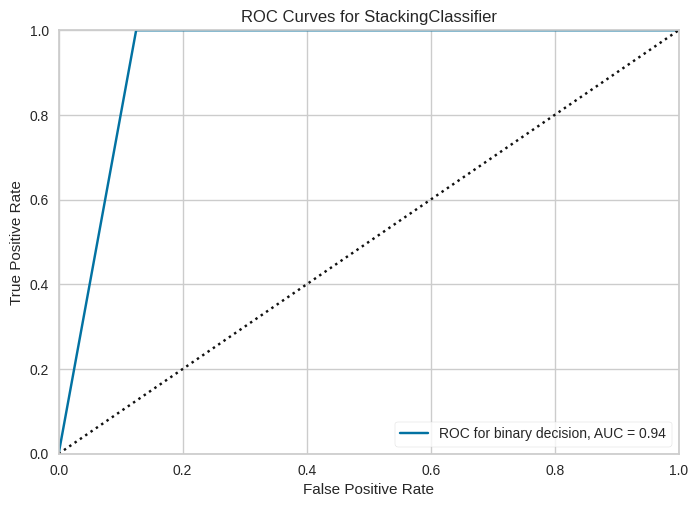

In [93]:
classes = y.unique()  
binary = True if classes.shape[0] == 2 else False 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes, binary=binary);

### Filtered Classification report

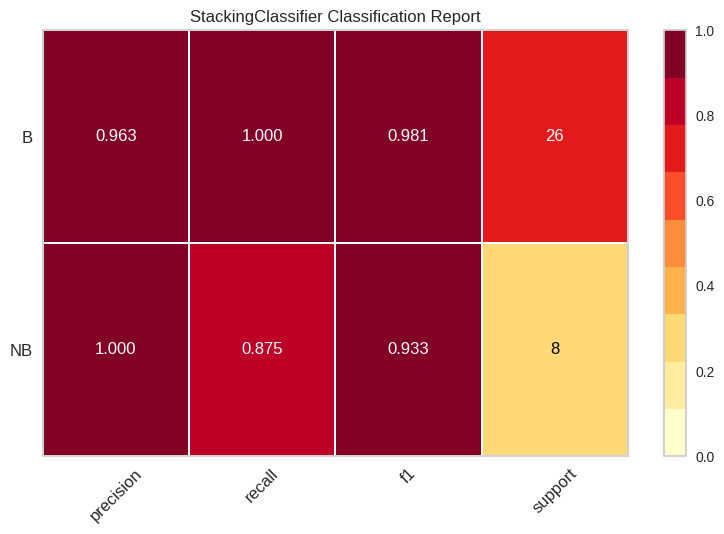

In [94]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Filtered Confusion matrix

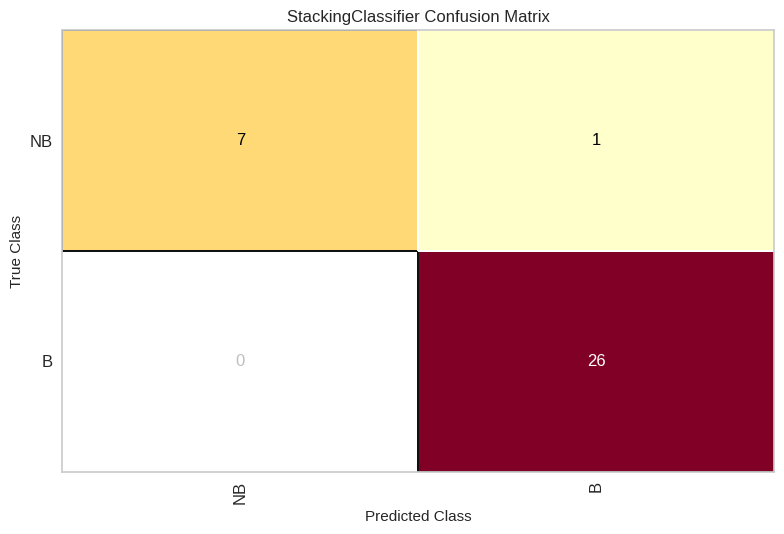

In [95]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Filtered Class prediction error

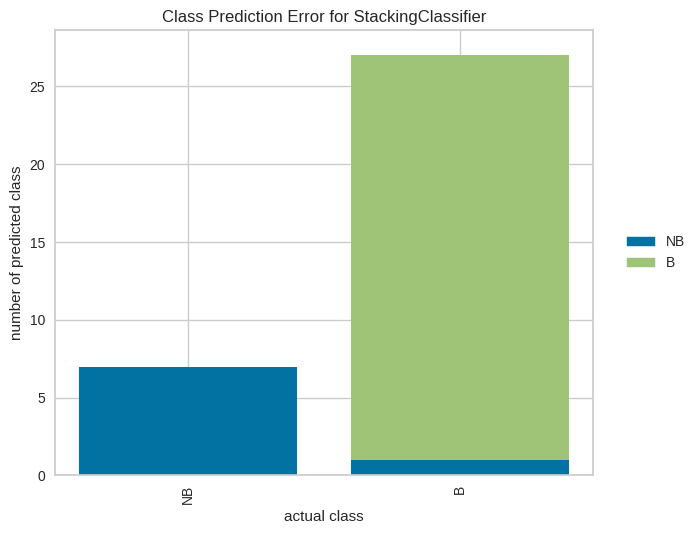

In [96]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Filtered Model inspection

### Filtered Model importance

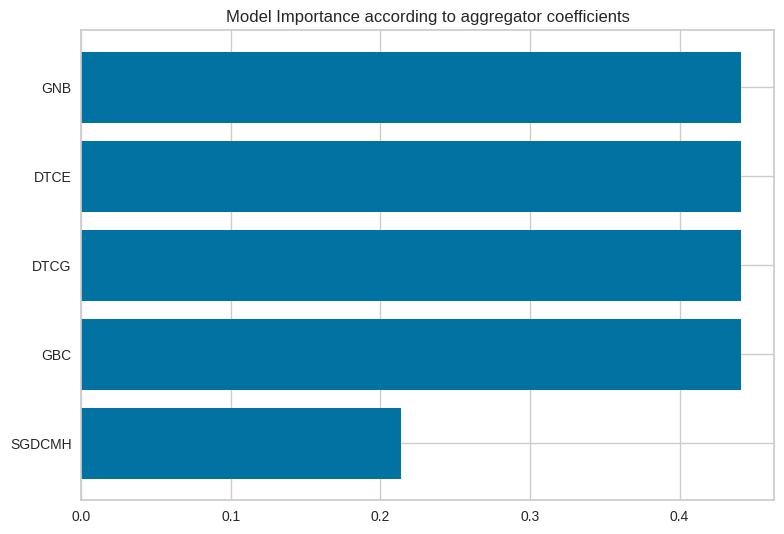

In [97]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

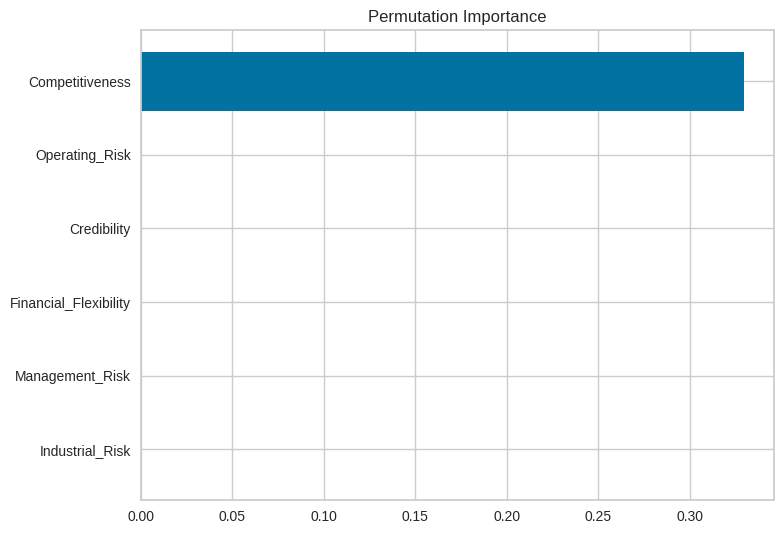

In [98]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [99]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [100]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [101]:
print(dropped_cols)

['Industrial_Risk']


# Modeling: Final model

In [102]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [103]:
reduce_schema('column_name', dropped_cols)

## Splitting

### Splitting dataframe in features and targets

In [104]:
y = df[target_col] 

In [105]:
X = df.drop(target_col, axis=1) 

### Dimensions

In [106]:
nb_features = len(X.columns.tolist()) 

In [107]:
nb_targets = len(y.unique()) 

In [108]:
layer_size = nb_features + nb_targets + 2 

### Splitting data in train and test sets 

In [109]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

### Encoding

In [110]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test)) 

## Final model building

#### Select the categorical and numerical columns

In [111]:
cat_selector, num_selector = get_features() 

#### For models based on tree

In [112]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 

In [113]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True)) 

In [114]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)) 

#### For models not based on tree

In [115]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 

In [116]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler()) 

In [117]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)) 

#### Final level-0 models

In [118]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTCG', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='gini', random_state = random_state))), 
          ('DTCE', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='entropy', random_state = random_state))), 
          ('RFCG', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=100, random_state = random_state))), 
          ('RFCE', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=100, random_state = random_state))), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True, random_state = random_state))), 
          ('SGDCH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='hinge', penalty='elasticnet', random_state = random_state))), 
          ('SGDCLL', make_pipeline(ntree_preprocessor, SGDClassifier(loss='log_loss', penalty='elasticnet', random_state = random_state))), 
          ('SGDCMH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='modified_huber', penalty='elasticnet', random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('MLPC1', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPC2', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('SVCL', make_pipeline(ntree_preprocessor, SVC(kernel='linear', random_state = random_state))), 
          ('SVCP', make_pipeline(ntree_preprocessor, SVC(kernel='poly', random_state = random_state))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf', random_state = random_state))), 
          ('SVCS', make_pipeline(ntree_preprocessor, SVC(kernel='sigmoid', random_state = random_state))), 
          ('GBC', make_pipeline(tree_preprocessor, GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state = random_state))), 
          ]

In [119]:
level_0_f = list(set(level_0) & set(model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)))

#### Build the final model

In [120]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

## Final Model fitting

In [121]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 150 ms, sys: 8.28 ms, total: 159 ms
Wall time: 1.15 s


StackingClassifier(estimators=[('GNB',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                                  Series([], Name: column_name, dtype: object)),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImpute...
                                                                                                  ('ordinalencoder',
                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                  unknown_value=-1))]),
                                                                                  0          Management_Risk
1    Financial_Flexibility
2              Credibility
3          Competitiveness
4           Operating_Risk
Name: column_name, dtype: object)])),
                                                ('decisiontreeclassifier',
                                                 DecisionTreeClassifier(random_state=42))]))],
                   final_estimator=RidgeClassifier(alpha=1, positive=True,
                                                   random_state=42),
                   n_jobs=-1)

## Final Model evaluation

### Final Model scoring

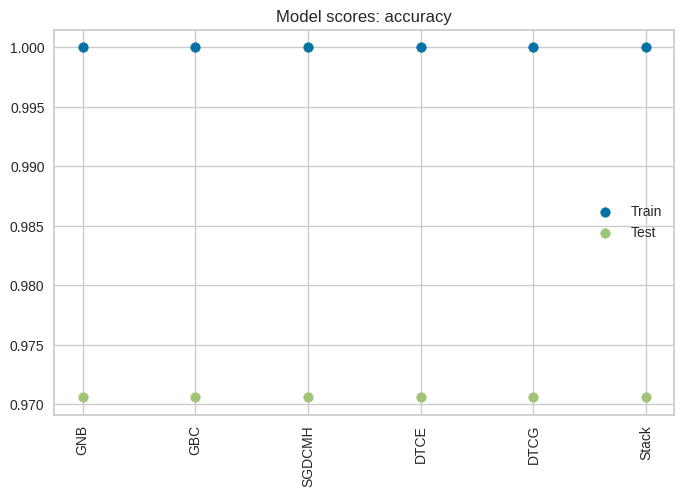

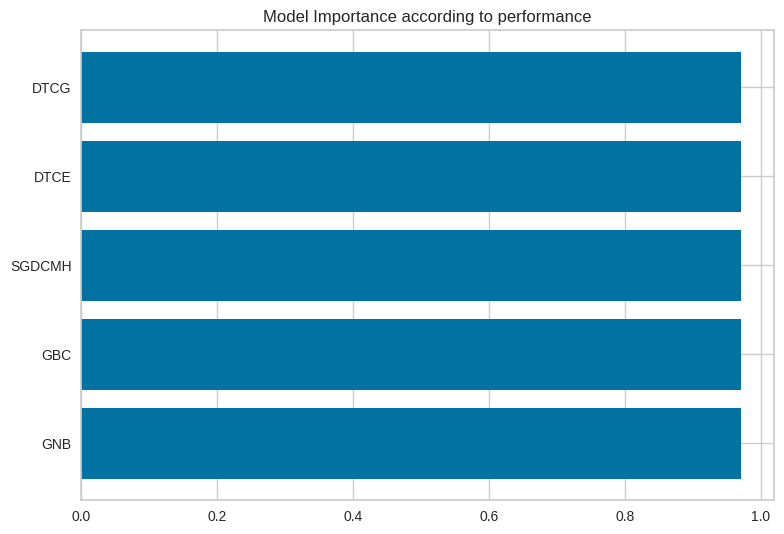

In [122]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

In [123]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

### Final feature elimination

In [124]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final ROC/AUC

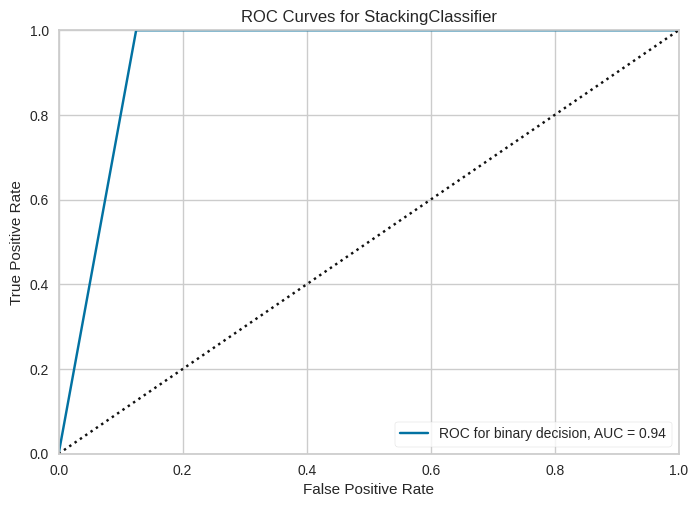

In [125]:
classes = y.unique()  
binary = True if classes.shape[0] == 2 else False 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes, binary=binary);

### Final Classification report

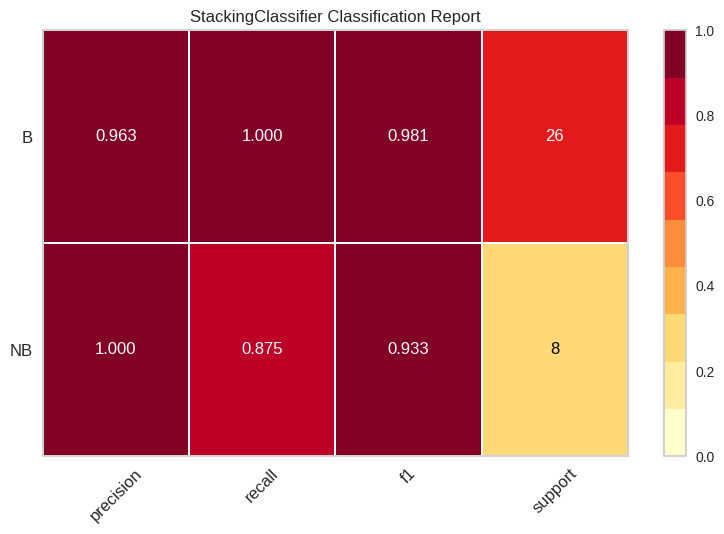

In [126]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Final Confusion matrix

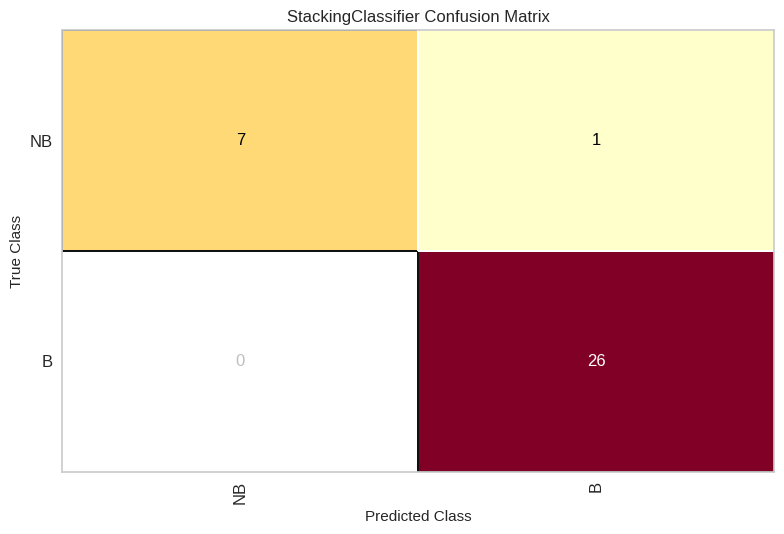

In [127]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Final Class prediction error

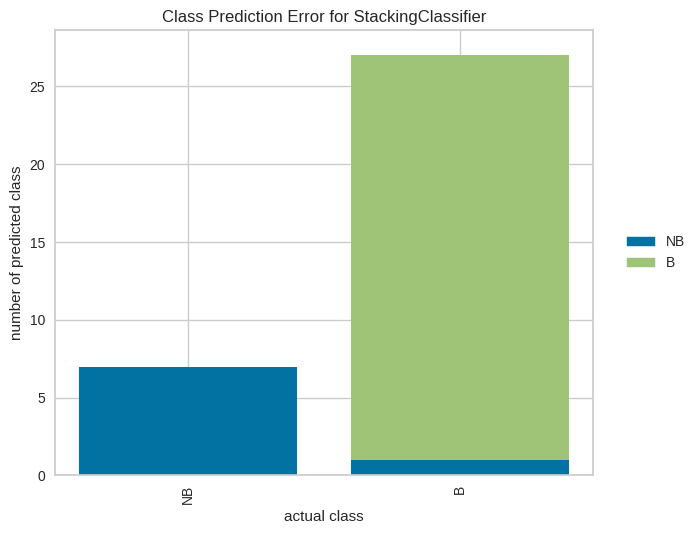

In [128]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Final Model inspection

### Final Model importance

In [129]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

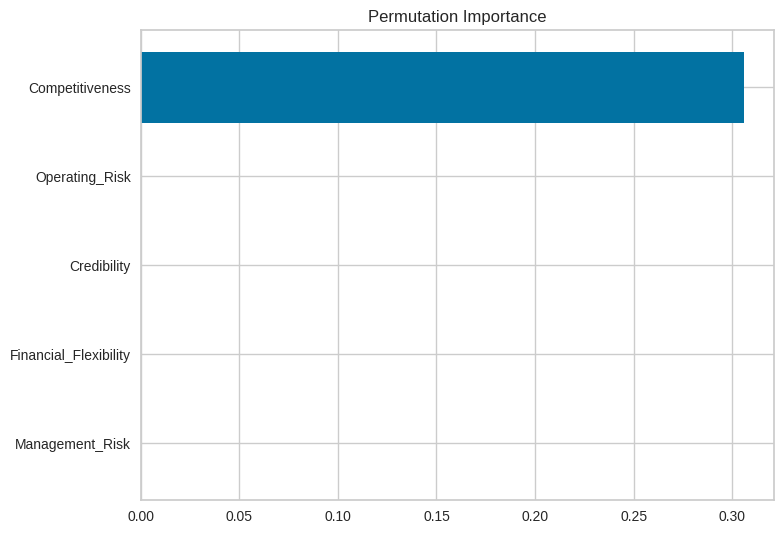

array([['Management_Risk', 0.0],
       ['Financial_Flexibility', 0.0],
       ['Credibility', 0.0],
       ['Operating_Risk', 0.0],
       ['Competitiveness', 0.3058823529411764]], dtype=object)

In [130]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [131]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU, target_encoder=target_encoder)

interactive(children=(Dropdown(description='feature', options=('Management_Risk', 'Financial_Flexibility', 'Cr…

# Test & Deployment

### Save the model

In [132]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate the server

In [133]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port, with_keras)

### [Test the API](./server.ipynb)

### Docker

In [134]:
dockerize(name, model, model_name, X, y, Docker_port, with_keras)